In [7]:
import numpy as np
import scipy as sp
import numpy.linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sy

In [3]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [52]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sy.Number)})

# <font face="gotham" color="purple"> Diagonalization of Symmetric Matrices</font>

The first theorem of symmetric matrix:

If $A$ is symmetric, i.e. $A = A^T$, then any two eigenvectors from different eigenspaces are orthogonal.

$$\begin{aligned}
\lambda_{1} \mathbf{v}_{1} \cdot \mathbf{v}_{2} &=\left(\lambda_{1} \mathbf{v}_{1}\right)^{T} \mathbf{v}_{2}=\left(A \mathbf{v}_{1}\right)^{T} \mathbf{v}_{2} \\
&=\left(\mathbf{v}_{1}^{T} A^{T}\right) \mathbf{v}_{2}=\mathbf{v}_{1}^{T}\left(A \mathbf{v}_{2}\right) \\
&=\mathbf{v}_{1}^{T}\left(\lambda_{2} \mathbf{v}_{2}\right) \\
&=\lambda_{2} \mathbf{v}_{1}^{T} \mathbf{v}_{2}=\lambda_{2} \mathbf{v}_{1} \cdot \mathbf{v}_{2}
\end{aligned}$$

Because $\lambda_1 \neq \lambda_2$, so only condition which makes the equation holds is 

$$
 \mathbf{v}_{1} \cdot \mathbf{v}_{2}=0
$$

With the help of this theorem, we can conclude that if symmetric matrix $A$ has different eigenvalues, its corresponding eigenvectors must be mutually orthogonal.

The diagonalization of $A$ is 

$$
A = PDP^T = PDP^{-1}
$$

where $P$ is an orthonormal matrix with all eigenvectors of $A$.

The <font face="gotham" color="red"> second</font> theorem of symmetric matrix:

<font face="gotham" color="red"> An $n \times n$ matrix $A$ is orthogonally diagonalizable if and only if $A$ is a symmetric matrix: $A^{T}=\left(P D P^{T}\right)^{T}=P^{T T} D^{T} P^{T}=P D P^{T}=A$.</font>

## <font face="gotham" color="purple"> An Example</font>

Create a random symmetric matrix.

In [27]:
A = np.round(2*np.random.rand(3, 3)); A

array([[0., 2., 2.],
       [1., 0., 2.],
       [1., 2., 1.]])

In [28]:
B = A@A.T; B # generate a symmetric matrix

array([[8., 4., 6.],
       [4., 5., 3.],
       [6., 3., 6.]])

Perform diagonalization with ```np.linalg.eig()```.

In [11]:
D, P = np.linalg.eig(B); P

array([[ 0.709,  0.699,  0.089],
       [ 0.399, -0.294, -0.868],
       [ 0.581, -0.651,  0.488]])

In [21]:
D = np.diag(D); D

array([[11.787,  0.   ,  0.   ],
       [ 0.   ,  0.082,  0.   ],
       [ 0.   ,  0.   ,  4.131]])

Check the norm of all eigenvectors.

In [7]:
for i in [0, 1, 2]:
    print(np.linalg.norm(P[:,i]))

0.9999999999999998
0.9999999999999999
1.0


Check the orthogonality of eigenvectors, see if $PP^T=I$

In [17]:
P@P.T

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## <font face="gotham" color="purple"> The Spectral Theorem</font>

An $n \times n$ symmetric matrix $A$ has the following properties:
1. $A$ has $n$ real eigenvalues, counting multiplicities.
2. The dimension of the eigenspace for each eigenvalue $\lambda$ equals the multiplicity of $\lambda$ as a root of the characteristic equation.
3. The eigenspaces are mutually orthogonal, in the sense that eigenvectors corresponding to different eigenvalues are orthogonal.
4. $A$ is orthogonally diagonalizable.

All these properties are obvious without proof, as the example above shows.However the purpose of the theorem  is not reiterating last section, it paves the way for <font face="gotham" color="red">spectral decomposition</font>.

Write diagonalization explicitly, we get the representation of spectral decomposition

$$
\begin{aligned}
A &=P D P^{T}=\left[\begin{array}{lll}
\mathbf{u}_{1} & \cdots & \mathbf{u}_{n}
\end{array}\right]\left[\begin{array}{ccc}
\lambda_{1} & & 0 \\
& \ddots & \\
0 & & \lambda_{n}
\end{array}\right]\left[\begin{array}{c}
\mathbf{u}_{1}^{T} \\
\vdots \\
\mathbf{u}_{n}^{T}
\end{array}\right] \\
&=\left[\begin{array}{lll}
\lambda_{1} \mathbf{u}_{1} & \cdots & \lambda_{n} \mathbf{u}_{n}
\end{array}\right]\left[\begin{array}{c}
\mathbf{u}_{1}^{T} \\
\vdots \\
\mathbf{u}_{n}^{T}
\end{array}\right]\\
&= \lambda_{1} \mathbf{u}_{1} \mathbf{u}_{1}^{T}+\lambda_{2} \mathbf{u}_{2} \mathbf{u}_{2}^{T}+\cdots+\lambda_{n} \mathbf{u}_{n} \mathbf{u}_{n}^{T}
\end{aligned}
$$

$ \mathbf{u}_{i} \mathbf{u}_{i}^{T}$ are rank $1$ symmetric matrices, because all rows of $ \mathbf{u}_{i} \mathbf{u}_{i}^{T}$ are multiples of $\mathbf{u}_{i}^{T}$.

Following the example above, we demonstrate in SymPy.

In [23]:
lamb0,lamb1,lamb2 = D[0,0], D[1,1], D[2,2]
u0,u1,u2 = P[:,0], P[:,1], P[:,2]

Check rank of $ \mathbf{u}_{i} \mathbf{u}_{i}^{T}$ by ```np.linalg.matrix_rank()```.

In [26]:
np.linalg.matrix_rank(np.outer(u0,u0))

1

Use spectral theorem to recover $A$:

In [11]:
specDecomp = lamb0 * np.outer(u0,u0) + lamb1 * np.outer(u1,u1) + lamb2 * np.outer(u2,u2)
specDecomp

array([[2., 3., 2.],
       [3., 6., 4.],
       [2., 4., 8.]])

# <font face="gotham" color="purple"> Quadratic Form</font>

A **quadratic form** is a function with form $Q(\mathbf{x})=\mathbf{x}^TA\mathbf{x}$, where $A$ is an $n\times n$ symmetric matrix, which is called the **the matrix of the quadratic form**.

Consider a matrix of quadratic form 

$$
A = 
\left[
\begin{matrix}
3 & 2 & 0\\
2 & -1 & 4\\
0 & 4 & -2
\end{matrix}
\right]
$$

construct the quadratic form $\mathbf{x}^TA\mathbf{x}$.

\begin{align}
\mathbf{x}^TA\mathbf{x}&=
\left[
\begin{matrix}
x_1 & x_2 & x_3
\end{matrix}
\right]
\left[
\begin{matrix}
3 & 2 & 0\\
2 & -1 & 4\\
0 & 4 & -2
\end{matrix}
\right]
\left[
\begin{matrix}
x_1 \\ x_2\\ x_3
\end{matrix}
\right]\\
& =\left[
\begin{matrix}
x_1 & x_2 & x_3
\end{matrix}
\right]
\left[
\begin{matrix}
3x_1+2x_2 \\ 2x_1-x_2+4x_3 \\ 4x_2-2x_3
\end{matrix}
\right]\\
& = 
x_1(3x_1+2x_2)+x_2(2x_1-x_2+4x_3)+x_3(4x_2-2x_3)\\
& = 3x_1^2+4x_1x_2-x_2^2+8x_2x_3-2x_3^2
\end{align}

Fortunately, there is an easier way to calculate quadratic form.

Notice that coefficients of $x_i^2$ is on the principal diagonal and coefficients of $x_ix_j$ are be split evenly between $(i,j)-$ and $(j, i)-$entries in $A$.

## <font face="gotham" color="purple"> Example </font>

Consider another example,

$$
A = 
\left[
\begin{matrix}
3 & 2 & 0 & 5\\
2 & -1 & 4 & -3\\
0 & 4 & -2 & -4\\
5 & -3 & -4 & 7
\end{matrix}
\right]
$$


All $x_i^2$'s terms are 

$$
3x_1^2-x_2^2-2x_3^2+7x_4^2
$$

whose coefficients are from principal diagonal.

All $x_ix_j$'s terms are 

$$
4x_1x_2+0x_1x_3+10x_1x_4+8x_2x_3-6x_2x_4-8x_3x_4
$$

Add up together then quadratic form is 

$$
3x_1^2-x_2^2-2x_3^2+7x_4^2+4x_1x_2+0x_1x_3+10x_1x_4+8x_2x_3-6x_2x_4-8x_3x_4
$$

Let's verify in SymPy.

In [30]:
x1, x2, x3, x4 = sy.symbols('x_1 x_2 x_3 x_4')
A = sy.Matrix([[3,2,0,5],[2,-1,4,-3],[0,4,-2,-4],[5,-3,-4,7]])
x = sy.Matrix([x1, x2, x3, x4])

In [31]:
sy.expand(x.T*A*x)

Matrix([[3*x_1**2 + 4*x_1*x_2 + 10*x_1*x_4 - x_2**2 + 8*x_2*x_3 - 6*x_2*x_4 - 2*x_3**2 - 8*x_3*x_4 + 7*x_4**2]])

The results is exactly the same as we derived.

## <font face="gotham" color="purple"> Change of Variable in Quadratic Forms</font>

To convert a matrix of quadratic form into diagonal matrix can save us same troubles, that is to say, no cross products terms. 

Since $A$ is symmetric, there is an orthonormal $P$ that

$$
PDP^T = A \qquad \text{and}\qquad PP^T = I
$$

We can show that

$$
\mathbf{x}^TA\mathbf{x}=\mathbf{x}^TIAI\mathbf{x}=\mathbf{x}^TPP^TAPP^T\mathbf{x}=\mathbf{x}^TPDP^T\mathbf{x}=(P^T\mathbf{x})^TDP^T\mathbf{x}=\mathbf{y}^T D \mathbf{y}$$

where $P^T$ defined a coordinate transformation and $\mathbf{y} = P^T\mathbf{x}$.

Consider $A$

$$
A = 
\left[
\begin{matrix}
3 & 2 & 0\\
2 & -1 & 4\\
0 & 4 & -2
\end{matrix}
\right]
$$

Find eigenvalue and eigenvectors.

In [57]:
A = np.array([[3,2,0],[2,-1,4],[0,4,-2]]); A

array([[ 3,  2,  0],
       [ 2, -1,  4],
       [ 0,  4, -2]])

In [58]:
D, P = np.linalg.eig(A)
D = np.diag(D); D

array([[ 4.388,  0.   ,  0.   ],
       [ 0.   ,  1.35 ,  0.   ],
       [ 0.   ,  0.   , -5.738]])

Test if $P$ is normalized.

In [59]:
P.T@P

array([[ 1., -0., -0.],
       [-0.,  1., -0.],
       [-0., -0.,  1.]])

We can compute $\mathbf{y}= P^T\mathbf{x}$

In [61]:
x1, x2, x3 = sy.symbols('x1 x2 x3')
x = sy.Matrix([[x1], [x2], [x3]])
x

Matrix([
[x1],
[x2],
[x3]])

In [63]:
P = round_expr(sy.Matrix(P), 4); P

Matrix([
[0.7738, -0.6143,  0.1544],
[0.5369,  0.5067, -0.6746],
[0.3362,  0.6049,  0.7219]])

So the $\mathbf{y} = P^T \mathbf{x}$ is 

$$
\left[\begin{matrix}0.7738 x_{1} + 0.5369 x_{2} + 0.3362 x_{3}\\- 0.6143 x_{1} + 0.5067 x_{2} + 0.6049 x_{3}\\0.1544 x_{1} - 0.6746 x_{2} + 0.7219 x_{3}\end{matrix}\right]
$$

The transformed quadratic form $\mathbf{y}^T D \mathbf{y}$ is

In [67]:
D =  round_expr(sy.Matrix(D),4);D

Matrix([
[4.3876,    0.0,     0.0],
[   0.0, 1.3505,     0.0],
[   0.0,    0.0, -5.7381]])

In [71]:
y1, y2, y3 = sy.symbols('y1 y2 y3')
y = sy.Matrix([[y1], [y2], [y3]]);y

Matrix([
[y1],
[y2],
[y3]])

In [72]:
y.T*D*y

Matrix([[4.3876*y1**2 + 1.3505*y2**2 - 5.7381*y3**2]])

## <font face="gotham" color="purple"> Visualize the Quadratic Form</font>

The codes are exceedingly lengthy, but intuitive.

<IPython.core.display.Javascript object>


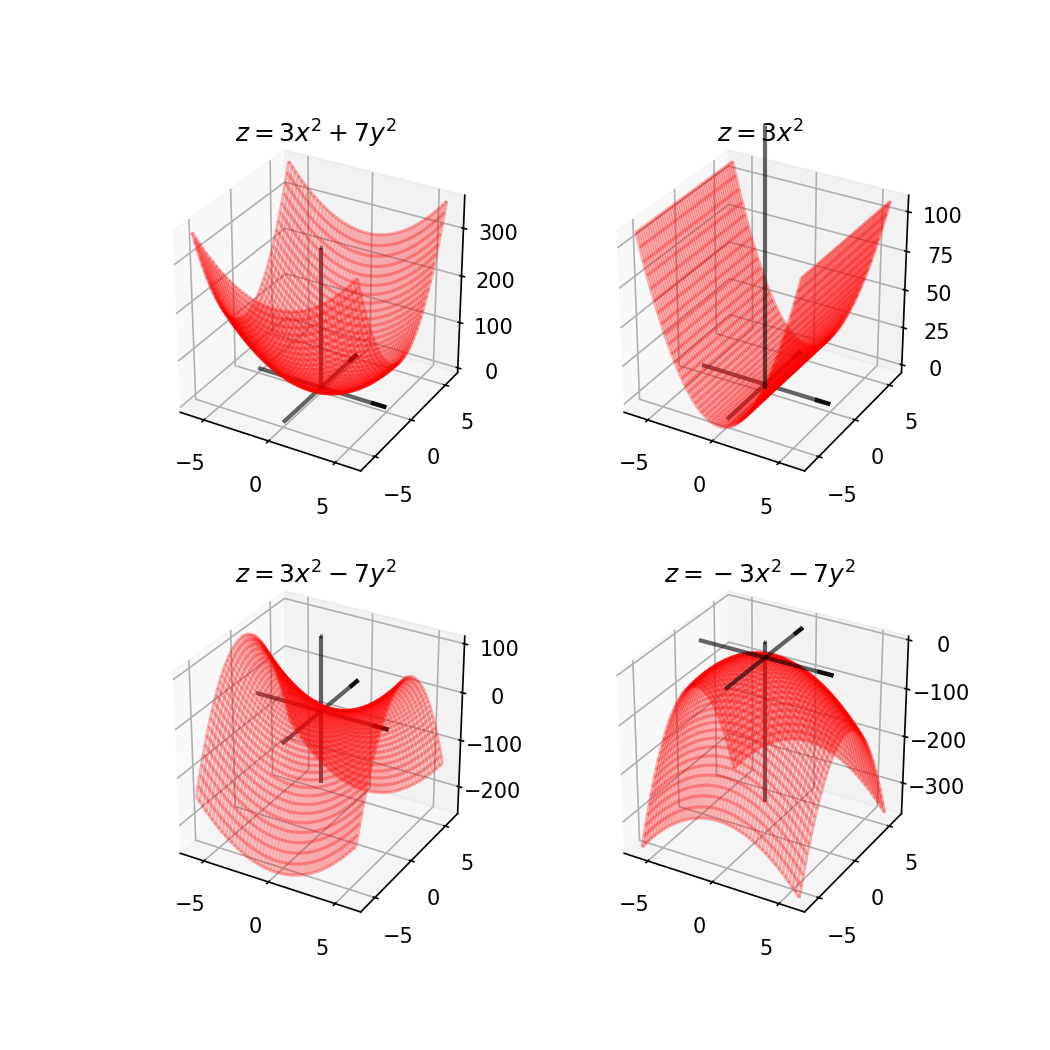

In [79]:
%matplotlib notebook
k = 6
x = np.linspace(-k, k)
y = np.linspace(-k, k)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize = (7, 7))

########################### xAx 1 ############################
Z = 3*X**2 + 7*Y**2
ax = fig.add_subplot(221, projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3, color = 'r')
ax.set_title('$z = 3x^2+7y^2$')

xarrow = np.array([[-5, 0, 0, 10, 0, 0]])
X1, Y1, Z1, U1, V1, W1 = zip(*xarrow)
ax.quiver(X1, Y1, Z1, U1, V1, W1, length=1, normalize=False, color = 'black', 
          alpha = .6, arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

yarrow = np.array([[0, -5, 0, 0, 10, 0]])
X2, Y2, Z2, U2, V2, W2 = zip(*yarrow)
ax.quiver(X2, Y2, Z2, U2, V2, W2, length=1, normalize=False, color = 'black',
          alpha = .6, arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

zarrow = np.array([[0, 0, -3, 0, 0, 300]])
X3, Y3, Z3, U3, V3, W3 = zip(*zarrow)
ax.quiver(X3, Y3, Z3, U3, V3, W3, length=1, normalize=False, color = 'black', 
alpha = .6, arrow_length_ratio = .001, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

########################### xAx 2 ############################
Z = 3*X**2
ax = fig.add_subplot(222, projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3, color = 'r')
ax.set_title('$z = 3x^2$')
xarrow = np.array([[-5, 0, 0, 10, 0, 0]])
X1, Y1, Z1, U1, V1, W1 = zip(*xarrow)
ax.quiver(X1, Y1, Z1, U1, V1, W1, length=1, normalize=False, color = 'black', 
          alpha = .6, arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

yarrow = np.array([[0, -5, 0, 0, 10, 0]])
X2, Y2, Z2, U2, V2, W2 = zip(*yarrow)
ax.quiver(X2, Y2, Z2, U2, V2, W2, length=1, normalize=False, color = 'black', 
          alpha = .6, arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

zarrow = np.array([[0, 0, -3, 0, 0, 800]])
X3, Y3, Z3, U3, V3, W3 = zip(*zarrow)
ax.quiver(X3, Y3, Z3, U3, V3, W3, length=1, normalize=False, color = 'black', 
          alpha = .6, arrow_length_ratio = .001, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

########################### xAx 3 ############################
Z = 3*X**2 - 7*Y**2
ax = fig.add_subplot(223, projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3, color = 'r')
ax.set_title('$z = 3x^2-7y^2$')
xarrow = np.array([[-5, 0, 0, 10, 0, 0]])
X1, Y1, Z1, U1, V1, W1 = zip(*xarrow)
ax.quiver(X1, Y1, Z1, U1, V1, W1, length=1, normalize=False, color = 'black', 
          alpha = .6, arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

yarrow = np.array([[0, -5, 0, 0, 10, 0]])
X2, Y2, Z2, U2, V2, W2 = zip(*yarrow)
ax.quiver(X2, Y2, Z2, U2, V2, W2, length=1, normalize=False, color = 'black', 
          alpha = .6, arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

zarrow = np.array([[0, 0, -150, 0, 0, 300]])
X3, Y3, Z3, U3, V3, W3 = zip(*zarrow)
ax.quiver(X3, Y3, Z3, U3, V3, W3, length=1, normalize=False, color = 'black', 
          alpha = .6, arrow_length_ratio = .001, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

########################### xAx 4 ############################
Z = -3*X**2 - 7*Y**2
ax = fig.add_subplot(224, projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3, color = 'r')
ax.set_title('$z = -3x^2-7y^2$')
xarrow = np.array([[-5, 0, 0, 10, 0, 0]])
X1, Y1, Z1, U1, V1, W1 = zip(*xarrow)
ax.quiver(X1, Y1, Z1, U1, V1, W1, length=1, normalize=False, color = 'black', 
          alpha = .6, arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

yarrow = np.array([[0, -5, 0, 0, 10, 0]])
X2, Y2, Z2, U2, V2, W2 = zip(*yarrow)
ax.quiver(X2, Y2, Z2, U2, V2, W2, length=1, normalize=False, color = 'black', 
          alpha = .6, arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)

zarrow = np.array([[0, 0, -300, 0, 0, 330]])
X3, Y3, Z3, U3, V3, W3 = zip(*zarrow)
ax.quiver(X3, Y3, Z3, U3, V3, W3, length=1, normalize=False, color = 'black', 
          alpha = .6, arrow_length_ratio = .001, pivot = 'tail',
          linestyles = 'solid',linewidths = 2)
plt.show()

Now some terms to need to be defined, a quadratic form $Q$ is:
1. positive definite if $Q(\mathbf{x})>0$ for all $\mathbf{x} \neq \mathbf{0}$
2. negative definite if $Q(\mathbf{x})<0$ for all $\mathbf{x} \neq \mathbf{0}$
3. positive semidefinite if $Q(\mathbf{x})\geq0$ for all $\mathbf{x} \neq \mathbf{0}$
4. negative semidefinite if $Q(\mathbf{x})\leq0$ for all $\mathbf{x} \neq \mathbf{0}$
5. indefinite if $Q(\mathbf{x})$ assumes both positive and negative values.

We have a theorem for quadratic forms and eigenvalues:

Let $A$ be an $n \times n$ symmetric matrix. Then a quadratic form $\mathbf{x}^{T} A \mathbf{x}$ is:


1. positive definite if and only if the eigenvalues of $A$ are all positive
2. negative definite if and only if the eigenvalues of $A$ are all negative
3. indefinite if and only if $A$ has both positive and negative eigenvalues

With the help of this theorem, we can immediate tell if a quadratic form has a maximum, minimum or saddle point after calculating the eigenvalues.

## <font face="gotham" color="purple"> Positive Definite Matrix</font>

Symmetric matrices are one of the most important matrix form in linear algebra, we will show they are always positive definite.

${A}$ is a symmetric matrix, premultiplying ${A}\mathbf{x}=\lambda \mathbf{x}$ by $\mathbf{x}^T$

$$
\mathbf{x}^T{A}\mathbf{x} = \lambda \mathbf{x}^T\mathbf{x} = \lambda \|\mathbf{x}\|^2
$$

$\mathbf{x}^T{A}\mathbf{x}$ must be positive, since we defined so, then $\lambda$ must be larger than $0$.

Try asking the other way around: if all eigenvalues are positive, is $A_{n\times n}$ positive definite? Yes.

Here is the <font face="gotham" color="red">Principal Axes Theorem</font> which employs the orthogonal change of variable $\mathbf{x}=P\mathbf{y}$:

$$
Q(\mathbf{x})=\mathbf{x}^{T} A \mathbf{x}=\mathbf{y}^{T} D \mathbf{y}=\lambda_{1} y_{1}^{2}+\lambda_{2} y_{2}^{2}+\cdots+\lambda_{n} y_{n}^{2}
$$

If all of $\lambda$'s are positive, $\mathbf{x}^{T} A \mathbf{x}$ is also positive.

## <font face="gotham" color="purple"> Cholesky Decomposition</font>

Cholesky decomposition is modification of $LU$ decomposition. And it is more efficient than $LU$ algorithm.

If $A$ is positive definite matrix, i.e. $\mathbf{x}^{T} A \mathbf{x}>0$ or every eigenvalue is strictly positive. A positive definite matrix can be decomposed into a multiplication of lower triangular matrix and its transpose.

$$\begin{aligned}
{A}={L} {L}^{T} &=\left[\begin{array}{ccc}
l_{11} & 0 & 0 \\
l_{21} & l_{22} & 0 \\
l_{31} & l_{32} & l_{33}
\end{array}\right]\left[\begin{array}{ccc}
l_{11} & l_{21} & l_{31} \\
0 & l_{22} & l_{32} \\
0 & 0 & l_{33}
\end{array}\right] \\
\left[\begin{array}{ccc}
a_{11} & a_{21} & a_{31} \\
a_{21} & a_{22} & a_{32} \\
a_{31} & a_{32} & a_{33}
\end{array}\right] 
&=\left[\begin{array}{ccc}
l_{11}^{2} &l_{21} l_{11} & l_{31} l_{11} \\
l_{21} l_{11} & l_{21}^{2}+l_{22}^{2} & l_{31} l_{21}+l_{32} l_{22} \\
l_{31} l_{11} & l_{31} l_{21}+l_{32} l_{22} & l_{31}^{2}+l_{32}^{2}+l_{33}^{2}
\end{array}\right]
\end{aligned}$$

We will show this with NumPy.

In [82]:
A = np.array([[16, -8, -4], [-8, 29, 12], [-4, 12, 41]]); A

array([[16, -8, -4],
       [-8, 29, 12],
       [-4, 12, 41]])

In [83]:
L = sp.linalg.cholesky(A, lower = True); L

array([[ 4.,  0.,  0.],
       [-2.,  5.,  0.],
       [-1.,  2.,  6.]])

Check if $LL^T=A$

In [84]:
L@L.T

array([[16., -8., -4.],
       [-8., 29., 12.],
       [-4., 12., 41.]])

# <font face="gotham" color="purple"> Some Facts of Symmetric Matrices</font>

## <font face="gotham" color="purple">Rank and Positive Definiteness</font>

If a symmetric matrix $A$ does not have full rank, which means there must be a non-trivial vector $\mathbf{v}$ satisfies

$$
A\mathbf{v} = \mathbf{0}
$$

which also means the quadratic form equals zero $\mathbf{v}^TA\mathbf{v} = \mathbf{0}$. Thus $A$ can not be a positive definite matrix if it does not have full rank.

Contrarily, a matrix to be positive definite must have full rank.